<a href="https://colab.research.google.com/github/shaimathamer/Data-anlysis/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (heart)
## by (Shaima AHMED)

>** The data gives an overview of the diseases of those afflicted with the heart and predict the person can have heart disease or not based on the characteristics that has**



```
# import libraries
```



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se
from termcolor import colored
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


```
#import your dataset 
```

In [ ]:
file= pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
file.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
file.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We are lucky ,all the data is numerical so we can go directly to the operations,lets go !

**Find the mean, median, standard deviation**

In [ ]:
for col in file.columns:
  mean_col=np.mean(file[col])
  median_col=np.median(file[col])
  stand_col=np.std(file[col])
  print(colored(col,'red'),':',colored('Mean :','blue'),
  mean_col,colored('Median:','blue'),median_col,colored('Standard deviation:','blue'),stand_col)


  
    
  

age : Mean : 54.366336633663366 Median: 55.0 Standard deviation: 9.067101638577872
sex : Mean : 0.6831683168316832 Median: 1.0 Standard deviation: 0.46524119304834705
cp : Mean : 0.966996699669967 Median: 1.0 Standard deviation: 1.0303480250839467
trestbps : Mean : 131.62376237623764 Median: 130.0 Standard deviation: 17.509178065734385
chol : Mean : 246.26402640264027 Median: 240.0 Standard deviation: 51.74515101045714
fbs : Mean : 0.1485148514851485 Median: 0.0 Standard deviation: 0.3556096038825336
restecg : Mean : 0.528052805280528 Median: 1.0 Standard deviation: 0.5249911240963213
thalach : Mean : 149.64686468646866 Median: 153.0 Standard deviation: 22.867332581889233
exang : Mean : 0.32673267326732675 Median: 0.0 Standard deviation: 0.4690185854386941
oldpeak : Mean : 1.0396039603960396 Median: 0.8 Standard deviation: 1.1591574732421361
slope : Mean : 1.3993399339933994 Median: 1.0 Standard deviation: 0.6152084301256662
ca : Mean : 0.7293729372937293 Median: 0.0 Standard deviation

**Create a normalized form whose values range exactly between 0 and 1 so that the minimum has value 0 and maximum has value 1.**

In [ ]:
file_copy=file.copy()
file_copy.head()
for col in file.columns:
    mean_col=np.min(file[col])
    stand_col=np.max(file[col])
    file[col]=(file[col]-mean_col)/(mean_col-stand_col)


file.head()
    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.708333,-1.0,-1.000000,-0.481132,-0.244292,-1.0,-0.0,-0.603053,-0.0,-0.370968,-0.0,-0.0,-0.333333,-1.0
1,-0.166667,-1.0,-0.666667,-0.339623,-0.283105,-0.0,-0.5,-0.885496,-0.0,-0.564516,-0.0,-0.0,-0.666667,-1.0
2,-0.250000,-0.0,-0.333333,-0.339623,-0.178082,-0.0,-0.0,-0.770992,-0.0,-0.225806,-1.0,-0.0,-0.666667,-1.0
3,-0.562500,-1.0,-0.333333,-0.245283,-0.251142,-0.0,-0.5,-0.816794,-0.0,-0.129032,-1.0,-0.0,-0.666667,-1.0
4,-0.583333,-0.0,-0.000000,-0.245283,-0.520548,-0.0,-0.5,-0.702290,-1.0,-0.096774,-1.0,-0.0,-0.666667,-1.0


**Compute the softmax score**

**Find the number and position of missing values**

In [ ]:
missing_count=file.isnull().sum()
print(missing_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


No Missing value has been found 

**Select the rows that does not have any value**

In [ ]:
row_missing=file.isnull().sum(axis = 0)
print(row_missing)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Find the unique values and the count of unique values**

In [ ]:
for col in file_copy.columns:
  uniq=file_copy[col].unique()
  print(colored('Unique Value on','red'),colored(col,'blue'),uniq)

Unique Value on age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
Unique Value on sex [1 0]
Unique Value on cp [3 2 1 0]
Unique Value on trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
Unique Value on chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 2

We conclude every unique value for each column show restriaction that laied .

**Find the most frequent value of dataset**

In [ ]:
for col in file_copy.columns:
 freq=file_copy[col].value_counts().idxmax()
 print(colored('Unique Value on','red'),colored(col,'blue'),freq)



Unique Value on age 58
Unique Value on sex 1
Unique Value on cp 0
Unique Value on trestbps 120
Unique Value on chol 234
Unique Value on fbs 0
Unique Value on restecg 1
Unique Value on thalach 162
Unique Value on exang 0
Unique Value on oldpeak 0.0
Unique Value on slope 2
Unique Value on ca 0
Unique Value on thal 2
Unique Value on target 1


so we conclude that men has more precentge to get heart disease

> Write the structure  of your dataset here 




----

# Type of data analysis
## Univariate
> is a term commonly used in statistics to describe a type of data which consists of observations on only a single characteristic or attribute.

>Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

## Bivariate
>In statistics, bivariate data is data on each of two variables, where each value of one of the variables is paired with a value of the other variable. Typically it would be of interest to investigate the possible association between the two variables.

>Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

## Multivariate
>Multivariate statistics is a subdivision of statistics encompassing the simultaneous observation and analysis of more than one outcome variable. The application of multivariate statistics is multivariate analysis.

>Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

![picture](https://drive.google.com/uc?export=view&id=1ors5QRIf6ISa-aidarRJ6A0-ueY31hk9)

------

# Univariate
> Make at least one chart
,write your observation under every chart

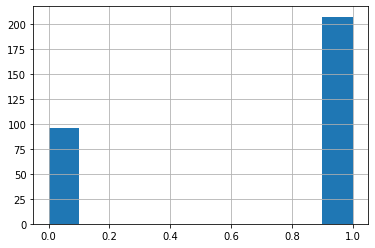

In [ ]:

fig, ax = plt.subplots()
file['sex'].hist()
pyplot.show()




------

# Bivariate
> Make at least one chart
,write your observation under every chart

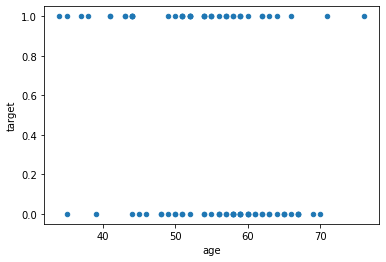

In [ ]:
file[file['age'] < 100].sample(100).plot.scatter(x='age', y='target')

----


# Multivariate
> Make at least one chart
,write your observation under every chart

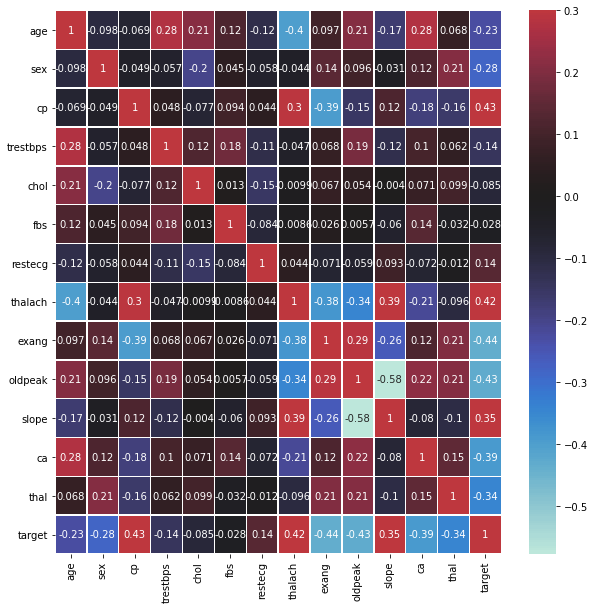

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
se.heatmap(file.corr(),annot=True,center=0,linewidths=.5,vmax=0.3,ax=ax)


----

# SUMMERY
 



>here write your summery about dataset

>List at least three insights.

1. logically the heart disease increase with age but the data shows there is no big realtion with .
1. most the sick people are men
1. thal and cp feature are the most factors affect the target value.





# Useful references

* [Python Guide](https://docs.python.org/3/tutorial/index.html)  
[Python Guide](https://www.w3schools.com/python/)
* [Data Cleaning Guide](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d)
* [Pandas Guide](https://pandas.pydata.org/docs/user_guide/index.html)
* [Matplotlib Examples](https://matplotlib.org/gallery/index.html)

* [Seaborn Examples](https://seaborn.pydata.org/examples/index.html)

